# Section 4.4 Properly scaling kernels

This page contains simulations in Section 4.4.

## Contents

    - Limiting spectrum of properly scaling kernel
    - Limiting spectrum and possible noisy spikes
    - Asymptotic equivalent of properly scaling kernel


## Limiting spectrum of properly scaling kernel

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
pi = np.pi

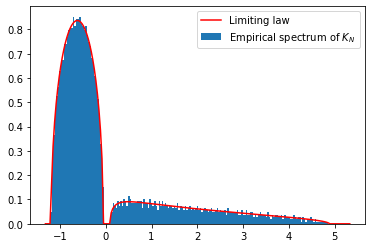

In [13]:
coeff = 4
p = 200*coeff
n = 800*coeff
c = p/n

f0 = lambda t : np.tanh(t)

integral_max = np.inf
a0 = scipy.integrate.quad(lambda t : f0(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]
f  = lambda t : f0(t) - a0

a1 = scipy.integrate.quad(lambda t : t*f(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]
a2 = scipy.integrate.quad(lambda t : (t**2-1)*f(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]/np.sqrt(2)
nu = scipy.integrate.quad(lambda t : f(t)**2*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]

Z_dist = 'gauss'

np.random.seed(928)
if Z_dist == 'gauss':
    Z = np.random.randn(p,n)
    m4 = 3
    
if Z_dist == 'bern': # Bernoulli with pairs (1,.5),(-1,.5)
    Z = np.sign(np.random.randn(p,n))
    m4 = 2

if Z_dist == 'skewed_bern': # Bernoulli with pairs (1/sqrt(3),.75),(-sqrt(3),.25)
    tmp = np.random.rand(p,n)
    Z = (tmp<3/4)*(1/np.sqrt(3))+(tmp>3/4)*(-np.sqrt(3))
    m4 = 7/3

if Z_dist == 'student': # student-t with param nu_student
    nu_student = 7
    Z = np.random.standard_t(nu_student,(p,n))/np.sqrt(nu_student/(nu_student-2))
    m4 = 6/(nu_student-4)+3

K_N = f(Z.T@Z/np.sqrt(p))/np.sqrt(p)
K_N = K_N - np.diag(np.diag(K_N))
eigs_K_N = np.linalg.eigh(K_N)[0]
ind = np.argsort(eigs_K_N)
eigs_K_N = eigs_K_N[ind]

if np.min(eigs_K_N)<0:
    edges = np.linspace(np.min(eigs_K_N)*1.1,np.max(eigs_K_N)*1.1,200)
else:
    edges = np.linspace(np.min(eigs_K_N)*0.9,np.max(eigs_K_M)*1.1,200)

if np.abs(a1)<1e-6:
    mu = np.sqrt([np.max([4*nu/c - e**2,0]) for e in edges])*c/nu/2/pi
else:
    y = 1e-5
    zs = edges+y*1j
    mu = []

    m=0
    for z in zs:
        m_tmp=-1
        while np.abs(m-m_tmp)>1e-6:
            m_tmp=m
            m = -1/( z + a1**2*m/(c+a1*m) + (nu-a1**2)*m/c )

        mu.append(np.imag(m)/pi)
    
plt.hist(eigs_K_N,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(len(eigs_K_N)),label=r'Empirical spectrum of $K_N$')
plt.plot(edges,mu,'r',label=r'Limiting law')
_ = plt.legend()

## Limiting spectrum and possible noisy spikes

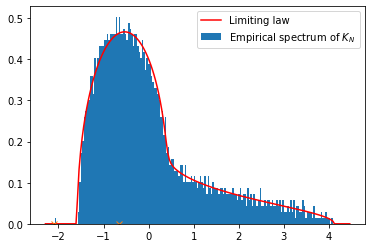

In [24]:
coeff = 4
p = 128*coeff
n = 512*coeff
c = p/n

f0 = lambda t : np.maximum(t,0.0)

integral_max = np.inf
a0 = scipy.integrate.quad(lambda t : f0(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]
f  = lambda t : f0(t) - a0

a1 = scipy.integrate.quad(lambda t : t*f(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]
a2 = scipy.integrate.quad(lambda t : (t**2-1)*f(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]/np.sqrt(2)
nu = scipy.integrate.quad(lambda t : f(t)**2*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]

Z_dist = 'student'

np.random.seed(928)
if Z_dist == 'gauss':
    Z = np.random.randn(p,n)
    m4 = 3
    
if Z_dist == 'bern': # Bernoulli with pairs (1,.5),(-1,.5)
    Z = np.sign(np.random.randn(p,n))
    m4 = 2

if Z_dist == 'skewed_bern': # Bernoulli with pairs (1/sqrt(3),.75),(-sqrt(3),.25)
    tmp = np.random.rand(p,n)
    Z = (tmp<3/4)*(1/np.sqrt(3))+(tmp>3/4)*(-np.sqrt(3))
    m4 = 7/3

if Z_dist == 'student': # student-t with param nu_student
    nu_student = 7
    Z = np.random.standard_t(nu_student,(p,n))/np.sqrt(nu_student/(nu_student-2))
    m4 = 6/(nu_student-4)+3

K_N = f(Z.T@Z/np.sqrt(p))/np.sqrt(p)
K_N = K_N - np.diag(np.diag(K_N))
eigs_K_N = np.linalg.eigh(K_N)[0]
ind = np.argsort(eigs_K_N)
eigs_K_N = eigs_K_N[ind]

if np.min(eigs_K_N)<0:
    edges = np.linspace(np.min(eigs_K_N)*1.1,np.max(eigs_K_N)*1.1,200)
else:
    edges = np.linspace(np.min(eigs_K_N)*0.9,np.max(eigs_K_N)*1.1,200)

if np.abs(a1)<1e-6:
    mu = np.sqrt([np.max([4*nu/c - e**2,0]) for e in edges])*c/nu/2/pi
else:
    y = 1e-5
    zs = edges+y*1j
    mu = []

    m=0
    for z in zs:
        m_tmp=-1
        while np.abs(m-m_tmp)>1e-6:
            m_tmp=m
            m = -1/( z + a1**2*m/(c+a1*m) + (nu-a1**2)*m/c )

        mu.append(np.imag(m)/pi)
    
plt.hist(eigs_K_N,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(len(eigs_K_N)),label=r'Empirical spectrum of $K_N$')
plt.plot(edges,mu,'r',label=r'Limiting law')
if (m4!=1 and np.abs(a2)>1e-5):
    delta = np.sqrt(2/(m4-1))
    spike_1 = -a2/c/delta-(a2*nu*delta+a1*(nu-a1**2)*delta**2)/(a2*(a2+a1*delta))
    spike_2 =  a2/c/delta+(a2*nu*delta-a1*(nu-a1**2)*delta**2)/(a2*(a2-a1*delta))
    plt.plot([spike_1, spike_2],[0,0],'x')
_ = plt.legend()

## Asymptotic equivalent of properly scaling kernel

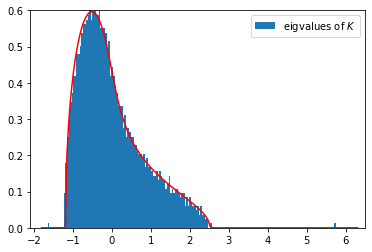

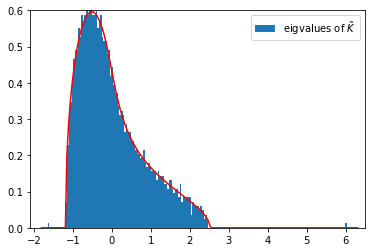

In [61]:
coeff = 8
p = 128*coeff
n = 256*coeff
c = p/n

cs = [1/2,1/2]
k = len(cs)

# a2=0
#f0 = lambda t : t
#f0 = lambda t : np.erf(t)
#f0 = lambda t : np.tanh(t)
#f0 = lambda t : np.atan(t)
#f0 = lambda t : 1/(1+np.exp(-t))
#f0 = lambda t : np.sign(t)

# a1=0
#f0 = lambda t : np.abs(t)
#f0 = lambda t : np.cos(t)
#f0 = lambda t : (t**2-1)/np.sqrt(2)
#f0 = lambda t : (t**3-3*t)/np.sqrt(6)
#f0 = lambda t : t**4/12

# a1, a2 != 0
f0 = lambda t : np.maximum(t,0.0)

integral_max = np.inf
a0 = scipy.integrate.quad(lambda t : f0(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]
f  = lambda t : f0(t) - a0

a1 = scipy.integrate.quad(lambda t : t*f(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]
a2 = scipy.integrate.quad(lambda t : (t**2-1)*f(t)*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]/np.sqrt(2)
nu = scipy.integrate.quad(lambda t : f(t)**2*np.exp(-t**2/2)/np.sqrt(2*pi),-integral_max,+integral_max)[0]

Z_dist = 'gauss'
testcase_option = 'mixed'

np.random.seed(928)
if Z_dist == 'gauss':
    Z = np.random.randn(p,n)
    m4 = 3
    
if Z_dist == 'bern': # Bernoulli with pairs (1,.5),(-1,.5)
    Z = np.sign(np.random.randn(p,n))
    m4 = 2

if Z_dist == 'skewed_bern': # Bernoulli with pairs (1/sqrt(3),.75),(-sqrt(3),.25)
    tmp = np.random.rand(p,n)
    Z = (tmp<3/4)*(1/np.sqrt(3))+(tmp>3/4)*(-np.sqrt(3))
    m4 = 7/3

if Z_dist == 'student': # student-t with param nu_student
    nu_student = 7
    Z = np.random.standard_t(nu_student,(p,n))/np.sqrt(nu_student/(nu_student-2))
    m4 = 6/(nu_student-4)+3

if testcase_option == 'iid':
    means = lambda i : np.zeros(p)
    covs_dif = lambda i : np.zeros(p)
    
if testcase_option == 'means':
    means = lambda i : np.concatenate([np.zeros(i),[1],np.zeros(p-i-1)])*2
    covs_dif = lambda i : np.zeros(p)
    
if testcase_option == 'var':
    means = lambda i : np.zeros(p)
    covs_dif = lambda i : np.eye(p)*((-1)**(i+1)/np.sqrt(p)*3)
    
if testcase_option == 'mixed':
    means = lambda i : (-1)**(i+1)*np.concatenate([[1],np.zeros(p-1)])*2
    covs_dif = lambda i : np.eye(p)*((-1)**(i+1)/np.sqrt(p)*5)
 
J = lambda i : np.concatenate([np.zeros(int(n*np.sum(cs[:i]))),np.ones(int(n*cs[i])),np.zeros(int(n*np.sum(cs[i+1:])))])

X=np.zeros( (p,n) )
for i in range(k):
    X[:,int(n*np.sum(cs[:i])):int(n*np.sum(cs[:i+1]))]=scipy.linalg.sqrtm(np.eye(p)+covs_dif(i))@Z[:,int(n*np.sum(cs[:i])):int(n*np.sum(cs[:i+1]))]+means(i).reshape(p,1)

P = np.eye(n) - np.ones((n,n))/n
X_center = X@P
K = f(X_center.T@X_center/np.sqrt(p))/np.sqrt(p)
K = K - np.diag(np.diag(K))
eigs_K,V_K = np.linalg.eigh(K)
ind = np.argsort(eigs_K)
eigs_K = eigs_K[ind]
V_K = V_K[ind]

if np.min(eigs_K)<0:
    edges = np.linspace(np.min(eigs_K)*1.1,np.max(eigs_K)*1.1,200)
else:
    edges = np.linspace(np.min(eigs_K)*0.9,np.max(eigs_K)*1.1,200)

if np.abs(a1)<1e-6:
    mu = np.sqrt([np.max([4*nu/c - e**2,0]) for e in edges])*c/nu/2/pi
else:
    y = 1e-5
    zs = edges+y*1j
    mu = []

    m=0
    for z in zs:
        m_tmp=-1
        while np.abs(m-m_tmp)>1e-6:
            m_tmp=m
            m = -1/( z + a1**2*m/(c+a1*m) + (nu-a1**2)*m/c )

        mu.append(np.imag(m)/pi)
    
K_N = f(Z.T@Z/np.sqrt(p))/np.sqrt(p)
K_N = K_N - np.diag(np.diag(K_N))
eigs_K_N = np.linalg.eigh(K_N)[0]

means_average = np.zeros(p)
for i in range(k):
    means_average += means(i)/k

M = np.zeros( (p,k) )
V = np.zeros( (n,2*k) )
t = np.zeros(k)
S = np.zeros( (k,k) )
for i in range(k):
    M[:,i] = means(i)-means_average

    V[:,i] = J(i)/np.sqrt(p)
    V[:,k+i] = Z.T@(means(i)-means_average)/np.sqrt(p)

    t[i] = np.trace(covs_dif(i))/np.sqrt(p)
    
    for j in range(k):
        S[i,j] = np.trace(covs_dif(i)@covs_dif(j))/np.sqrt(p)
        
A = np.concatenate([ np.concatenate([ a1*(M.T@M) + a2/np.sqrt(2)*(t.reshape(k,1) + t.reshape(1,k) + S), a1*np.eye(k) ],axis=1), np.concatenate([a1*np.eye(k),np.zeros( (k,k) ) ],axis=1)])
K_approx = K_N + V@A@(V.T)
eigs_K_approx, V_K_approx = np.linalg.eigh(K_approx)
ind = np.argsort(eigs_K_approx)
eigs_K_approx = eigs_K_approx[ind]
V_K_approx = V_K_approx[:,ind]  

plt.figure()
plt.hist(eigs_K,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(len(eigs_K)),label=r'eigvalues of $K$')
plt.plot(edges,mu,'r',)
plt.gca().set_xlim(-2.1,6.5)
plt.gca().set_ylim(0,.6)
_ = plt.legend()

plt.figure()
plt.hist(eigs_K_approx,bins=edges,weights=1/n/(edges[1]-edges[0])*np.ones(len(eigs_K)),label=r'eigvalues of $\tilde K$')
plt.plot(edges,mu,'r',)
plt.gca().set_xlim(-2.1,6.5)
plt.gca().set_ylim(0,.6)
_ = plt.legend()